# Activity: Perform multiple linear regression


## Introduction

A multiple linear regression helps in estimating the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows one to compare more than one variable to the variable that is measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, one will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. After finding a single variable that predicts sales in the previous work, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, one shall conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This includes:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [2]:
# Import libraries and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

Load the dataset `marketing_sales_data.csv` and display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab.

In [3]:
# IMPORT DATA.
campaigns_data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
campaigns_data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?
- Explore & examine potential variables in dataset
- Review the distribution of the features, such as range, mean, spread.
- To clean & manipulate data for effective modeling such as retifying missing values, incorrect entries, or inconsistent type / format. As generally, libraries like `statsmodels` & `scikit-learn` would not respond well to erroneous data.   

### Create a pairplot of the data

- A pairplot can be used to visualize the relationship between the continous variables in `data`.

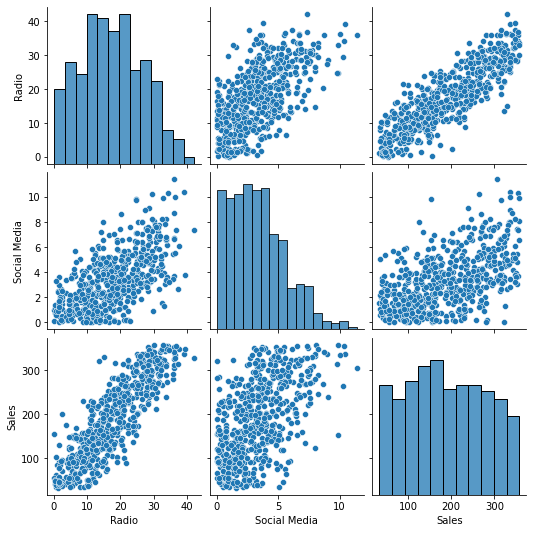

In [4]:
# Create a pairplot of the data.
sns.pairplot(campaigns_data)


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?

- From the scatterplot matrix, we can see that the `Radio` & `Sales` variables are linearly correlated with the points cluster around an underlying linear pattern. 
- Seaborn's pairplot method only emphasize on the relationships of numerical data, as such, the categorical factors in variables such as `TV` & `Influencer` are omitted.  


### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [10]:
# Calculate the mean sales for each TV category. 
TV_salesfactor = campaigns_data[['TV', 'Sales']].groupby(by='TV', as_index=False).mean()

# Calculate the mean sales for each Influencer category. 
infl_salesfactor = campaigns_data[['Influencer', 'Sales']].groupby(by='Influencer', as_index=False).mean()

print(f'{TV_salesfactor} \n\n {infl_salesfactor}')

       TV       Sales
0    High  300.853195
1     Low   90.984101
2  Medium  195.358032 

   Influencer       Sales
0      Macro  181.670070
1       Mega  194.487941
2      Micro  188.321846
3       Nano  191.874432


**Question:** What can be captured about the categorical variables? Could they be useful predictors of `Sales`?

- `TV` will be a good predictor for `Sales` where the categorial factors provide a distinctive, non-conflicting variation on mean sales. But otherwise for `Influencer` & `Sales`.    


### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [19]:
# Drop rows that contain missing data and update the DataFrame.
campaigns_data.isnull().any(axis=1).sum()

# there's no missing value along the columns in each row

0

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [21]:
# Rename all columns in data that contain a space. 
campaigns_data.rename({'Social Media': 'Social_Media'})


,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the desired independent variables, fit a multiple linear regression model that predicts `Sales` with two or more independent variables from `data`.

In [75]:
import statsmodels.formula.api as smf

# Define the OLS formula.
formula = "Sales ~ Radio + C(TV, Treatment('Low'))"

# Create an OLS model.
OLS = smf.ols(formula, data=campaigns_data) 

# Fit the model.
multiple_regr = OLS.fit()

# Save the results summary.
result = multiple_regr.summary()

# Display the model results.
result


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.63e-288
Time:                        10:34:02   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            64.2290      2.743     23.419      0.000      58.842      69.616
C(TV, Treatment('Low'))[T.High]     154.2971      4.929     31.303      0.000     144.616     163.979
C(TV, Treatment('Low'))[T.Medium]    78.9851      3.311     23.857      0.000      72.482      85.488
Radio                                 2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         94.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which independent variables did you choose for the model, and why?

- `Radio` and `TV` marketing features. These two variables strongly correlate with and give most predictive power to the target variable that is interested in measuring in this predictive task. 


### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for the model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) that is selected previously with `Sales` to check the linearity assumption. 
- Use the pairplot created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

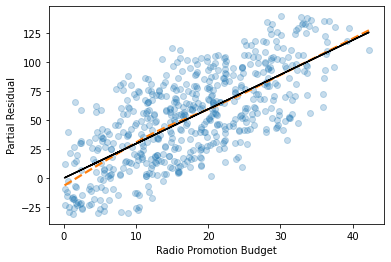

In [35]:
# Create a scatterplot for each independent variable and the dependent variable.
linearity = sns.regplot(x=campaigns_data.Radio,
                        y=multiple_regr.resid + campaigns_data['Radio'] * multiple_regr.params[3],
                        scatter_kws={'alpha': 0.25}, 
                        line_kws={'ls': '--', 'color': 'C1'},
                        lowess=True)
plt.plot(campaigns_data.Radio, campaigns_data.Radio * multiple_regr.params[3], 'k-')
plt.xlabel('Radio Promotion Budget'); plt.ylabel('Partial Residual')
plt.show()


**Question:** Is the linearity assumption met?
- Yes, the linear line closely follows the smooth estimation of underlying pattern in `Radio` scatterpoints as illustrated in the plot.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

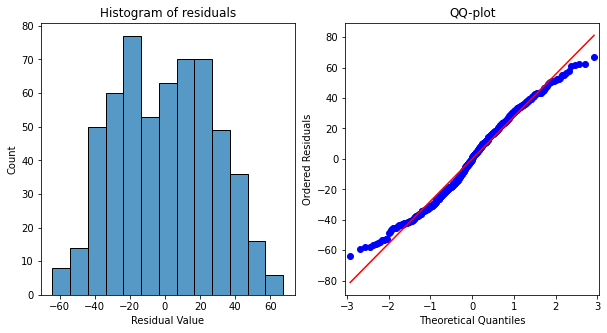

In [54]:
import statsmodels.api as sm

# Create a histogram with the residuals. 
norm_fig, norm_ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(multiple_regr.resid, bins='auto', ax=norm_ax[0])
norm_ax[0].set(title='Histogram of residuals', xlabel='Residual Value', ylabel='Count')

# Create a Q-Q plot of the residuals.
sm.qqplot(multiple_regr.resid, line='s', ax=norm_ax[1])
norm_ax[1].set(title='QQ-plot', xlabel='Theoretical Quantiles', ylabel='Ordered Residuals') 
plt.show()


**Question:** Is the normality assumption met?
- The distribution of residuals for multiple regression model is approximately normal with most of the points closed to standardized line within 2-SD and exhibit moderate kurtosis of long tail outliers at both ends. 


### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

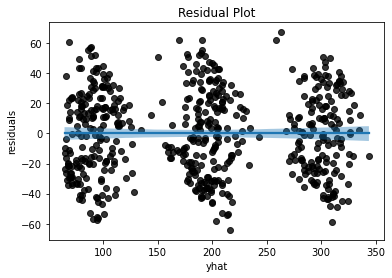

In [73]:
# For straight regr line, a simple scatterplot with horizontal line is sufficient. 
# Create a scatterplot with the fitted values from the model and the residuals.
ax = sns.regplot(x=multiple_regr.fittedvalues, y=multiple_regr.resid, 
                 ci=95, scatter_kws={'color': 'black'})
ax.set(title='Residual Plot', xlabel='yhat', ylabel='residuals')
plt.setp(ax.collections[1], alpha=0.4)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.show()


**Question:** Is the constant variance assumption met?
- Yes, the variance of the residuals is approximately constant across the model from low to high valued sales.  



### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check the model's no multicollinearity assumption.

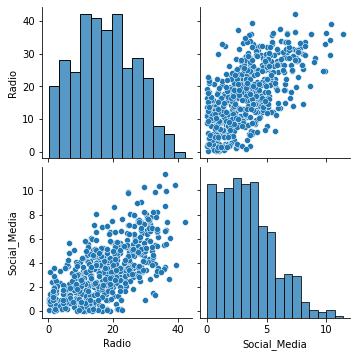

In [78]:
# Create a pairplot of the data.
sns.pairplot(campaigns_data[['Radio', 'Social_Media']])
plt.show()

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the variance inflation factor (optional).
variance_inflation_factor(campaigns_data[['Radio', 'Social_Media']].values, 1)


5.170921621625241

**Question 8:** Is the no multicollinearity assumption met?
- Yes, as the `social media` variable is omitted from the model.  


## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, one can interpret the model results accurately.

First, display the OLS regression results.

In [82]:
# Display the model results summary.
result


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.63e-288
Time:                        10:34:02   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            64.2290      2.743     23.419      0.000      58.842      69.616
C(TV, Treatment('Low'))[T.High]     154.2971      4.929     31.303      0.000     144.616     163.979
C(TV, Treatment('Low'))[T.Medium]    78.9851      3.311     23.857      0.000      72.482      85.488
Radio                                 2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         94.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is the interpretation of the model's R-squared?
- From the computed $R^{2} = 0.904$ value of the model, over 90% of the total variation in `Sales` is being explained by the predictor variables `Radio` & `TV` which is relatively high. This makes the model an excellent predictor of `Sales`.  

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

**Question:** What are the model coefficients?

* $b_{0} = 64.23$
* $b_{Radio} = 2.97$
* $b_{TVMedium} = 78.99$
* $b_{TVHigh} = 154.30$


**Question:** How would the relationship between `Sales` and the independent variables as a linear equation be written?

$\text{Sales} = b_{0} + b_1{Radio}*X_{Radio} + b_2{TVMedium}*X_{TVMedium}+ b_3{TVHigh}*X_{TVHigh}$

$\text{Sales} = 64.23 + 2.97 *X_{Radio} + 78.99*X_{TVMedium}+  154.30*X_{TVHigh}$

**Question:** What is the intepretation of the coefficient estimates? Are the coefficients statistically significant?
- For every million dollars more a company invested to radio promotion budget to promote their products/services, the company's sales is expected to be increased by 2.97 million dollars on average given the same TV promotion.  
- Similarly, a medium tv promotion budget setup to promote company's products/services is expected to raise the sales by 78.99 million dollars more than the low tv promotion budget on average. If instead a high tv promotion budget is chosen, the sales will be inflated by 75.31 million dollars more. 
- The estimated coefficients are statistically significant with p-values of 0.000, which is a very small chance in sampling variability. This indicates that there is a very slim chance that one could potentially observe data as extreme or more extreme than this sample when the null hypothesis is true. Hence, it is confident that the relationships btw the predictors & target are real.  


**Question:** Why is it important to interpret the beta coefficients?
- To effectively deduce valuable insights of the main effects in TV & Radio promotion budget have on Sales.   


**Question:** What is interested in exploring based on the model?
- Although the radio & tv promotion show very promising return in overall, but we're still lack of the specificity in factors of which have true effect on the sales, be it from a repeated ads, injected ads to program or other advertising strategies. Hence, it would be worth to collect more relevant features for more accurate prediction.        
- Additional plot using `statsmodels.plot_regress_exog` to quick check on all assumptions about the residuals for linear term.

**Question:** Could the model be improved further? Why or why not? How?
- Yes. From the normality plot earlier, we see that the distribution of model's residuals exhibit moderate kurtosis mainly due to the influence of outliers in the dataset.  We could potentially identify & mitigate the influence of outliers using a diagnostic plot, employ a robust regr model instead of multiple linear regr or simply increase the no. of data. 

## Conclusion

**What are the key takeaways from this lab?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

**What results can be presented from this lab?**

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average than a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance the interval $[144.616, 163.979]$ contains the true parameter of the slope of $b_{TVHigh}$, which is the estimated difference in promotion sales when a high TV promotional budget is chosen instead of a low TV promotion budget.

**How would you frame your findings to external stakeholders?**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a medium to high TV promotional budget increases sales by $\$75.3120$ million (95% CI $[68.193, 82.431])$, and switching from a high to low TV promotional budget increases sales by $\$154.297$ million (95% CI $[144.616, 163.979])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).